Preprocessing, Cleaning and EDA

In [ ]:
import pandas as pd

# Load the merged data
df = pd.read_csv(r'/content/processed_car_data.csv')

# Calculate the percentage of missing values for each column
df_null= df.isnull().mean() * 100

# Find columns with more than 40% missing values
columns_with_nulls = df_null[df_null > 40].index

# Display the columns
print("Columns with more than 40% missing values:")
print(columns_with_nulls)

Columns with more than 40% missing values:
Index(['priceActual', 'priceSaving', 'priceFixedText',
       'Engine and Transmission_BoreX Stroke',
       'Engine and Transmission_Compression Ratio',
       'Dimensions & Capacity_Front Tread', 'Dimensions & Capacity_Rear Tread',
       'Dimensions & Capacity_Gross Weight', 'Miscellaneous_Top Speed',
       'Miscellaneous_Acceleration', 'commonIcon',
       'Dimensions & Capacity_Ground Clearance Unladen'],
      dtype='object')


In [ ]:
#dropping more than 40% null
df.drop(['priceActual', 'priceSaving', 'priceFixedText',
       'Engine and Transmission_BoreX Stroke',
       'Engine and Transmission_Compression Ratio',
       'Dimensions & Capacity_Front Tread', 'Dimensions & Capacity_Rear Tread',
       'Dimensions & Capacity_Gross Weight', 'Miscellaneous_Top Speed',
       'Miscellaneous_Acceleration', 'commonIcon',
       'Dimensions & Capacity_Ground Clearance Unladen'],axis=1,inplace=True)


In [ ]:
#remove the duplicates and irrelevant columns

df.drop(['it','owner','Ownership','transmission','ft','trendingText.imgUrl','trendingText.heading','trendingText.desc','variantName','centralVariantId',
         'Registration Year','Insurance Validity','Seats','Miscellaneous_Seating Capacity','RTO','Engine Displacement','Engine and Transmission_Engine Type',
         'Engine and Transmission_Value Configuration','Engine and Transmission_Fuel Suppy System','Engine and Transmission_Max Power','Miscellaneous_No Door Numbers',
         'Engine and Transmission_Max Torque','Engine and Transmission_Values per Cylinder','Miscellaneous_Drive Type','Miscellaneous_Steering Type',
         'Miscellaneous_Cargo Volumn','Miscellaneous_Alloy Wheel Size','Engine and Transmission_Turbo Charger','Engine and Transmission_Super Charger',
         'Miscellaneous_Turning Radius','Kms Driven','Miscellaneous_Gear Box','Miscellaneous_Front Brake Type','Engine','Engine and Transmission_No of Cylinder',
         'Miscellaneous_Rear Brake Type','Engine and Transmission_Color','Dimensions & Capacity_Width','Year of Manufacture'],axis=1,inplace=True)

In [ ]:
print(df.columns)
print(df.shape)

Index(['bt', 'km', 'ownerNo', 'oem', 'model', 'modelYear', 'price',
       'Fuel Type', 'Transmission', 'Engine and Transmission_Displacement',
       'Dimensions & Capacity_Length', 'Dimensions & Capacity_Height',
       'Dimensions & Capacity_Wheel Base', 'Dimensions & Capacity_Kerb Weight',
       'Miscellaneous_Tyre Type', 'Mileage', 'Max Power', 'Torque', 'Seats.1',
       'Wheel Size', 'City'],
      dtype='object')
(8369, 21)


In [ ]:
# Rename columns for clarity
df.rename(columns={
    'bt': 'Body_Type',
    'km': 'Kilometers_Driven',
    'ownerNo': 'Owner_Count',
    'Fuel Type': 'Fuel_Type',
    'Engine and Transmission_Displacement':'Engine_CC',
    'Dimensions & Capacity_Length':'Length_mm',
    'Dimensions & Capacity_Height':'Height_mm',
    'Dimensions & Capacity_Wheel Base':'Wheel_Base_mm',
    'Dimensions & Capacity_Kerb Weight':'Kerb_weight_kg',
    'Miscellaneous_Tyre Type':'Tyre_Type',
    'Mileage': 'Mileage_Kmpl',
    'Max Power': 'Max_Power_BHP',
    'Torque': 'Torque_Nm',
    'Seats.1':'Seats',
    'Wheel Size':'Wheel_size'
}, inplace=True
)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Body_Type          8365 non-null   object 
 1   Kilometers_Driven  8369 non-null   object 
 2   Owner_Count        8369 non-null   int64  
 3   oem                8369 non-null   object 
 4   model              8369 non-null   object 
 5   modelYear          8369 non-null   int64  
 6   price              8369 non-null   object 
 7   Fuel_Type          8369 non-null   object 
 8   Transmission       8369 non-null   object 
 9   Engine_CC          8365 non-null   float64
 10  Length_mm          8290 non-null   object 
 11  Height_mm          8290 non-null   object 
 12  Wheel_Base_mm      8206 non-null   object 
 13  Kerb_weight_kg     8310 non-null   object 
 14  Tyre_Type          8292 non-null   object 
 15  Mileage_Kmpl       8082 non-null   object 
 16  Max_Power_BHP      8309 

In [ ]:
import pandas as pd
import datetime

# Current year for validation
current_year = datetime.datetime.now().year

# Convert 'Kilometers_Driven' to strings first, then remove commas and convert to integers
df['Kilometers_Driven'] = pd.to_numeric(df['Kilometers_Driven'].astype(str).str.replace(',', '', regex=False), errors='coerce' ).fillna(0).astype('int')

# Extract year from 'modelYear' and validate range
df['modelYear'] = (
    df['modelYear']
    .astype(str)
    .str.extract(r'(\d{4})')
    .fillna(0)
    .astype('int')
)
df['modelYear'] = df['modelYear'].apply(
    lambda x: x if 1900 <= x <= current_year else 0
)

# Function to convert prices
def convert_price(price):
    try:
        if isinstance(price, str):
            price = price.replace('â‚¹', '').replace('₹', '').replace(',', '').strip()  # Remove ₹ and commas
            if 'Crore' in price:
                return float(price.replace('Crore', '').strip()) * 1e7
            elif 'Lakh' in price:
                return float(price.replace('Lakh', '').strip()) * 1e5
            else:
                return float(price)
        return price
    except ValueError:
        return None  # Return None for invalid entries

# Apply the updated function
df['price'] = df['price'].apply(convert_price)

# Check for any remaining non-numeric values in 'price'
print(df['price'].isnull().sum(), "rows could not be converted")

# Clean 'Length' column - Remove non-numeric characters and convert to int
df['Length_mm'] = pd.to_numeric(df['Length_mm'].str.replace(r'[^0-9]', '', regex=True),errors='coerce')

# Clean 'Length' column - Remove non-numeric characters and convert to int
df['Height_mm'] = pd.to_numeric(df['Height_mm'].str.replace(r'[^0-9]', '', regex=True),errors='coerce')

# Clean 'Length' column - Remove non-numeric characters and convert to int
df['Wheel_Base_mm'] = pd.to_numeric(df['Wheel_Base_mm'].str.replace(r'[^0-9]', '', regex=True),errors='coerce')

# Clean 'Length' column - Remove non-numeric characters and convert to int
df['Kerb_weight_kg'] = pd.to_numeric(df['Kerb_weight_kg'].str.replace(r'[^0-9]', '', regex=True),errors='coerce')

# Convert 'Kilometers_Driven' to strings first, then remove commas and convert to float
df['Mileage_Kmpl'] = df['Mileage_Kmpl'].str.replace(r'[^\d\.]', '', regex=True).astype('float')

# Clean 'Max Power' - Remove non-numeric characters and convert to float
df['Max_Power_BHP'] = pd.to_numeric(df['Max_Power_BHP'].str.replace(r'[^\d\.]', '', regex=True), errors='coerce')

# Clean 'Torque' - Remove non-numeric characters and convert to float
df['Torque_Nm'] = pd.to_numeric(df['Torque_Nm'].str.replace(r'[^\d\.]', '', regex=True), errors='coerce')

# Extract numeric values from 'Wheel Size' and replace non-numeric characters
df['Wheel_size'] = pd.to_numeric(df['Wheel_size'].str.extract(r'(\d+)')[0], errors='coerce')

# Print the cleaned DataFrame for verification
print(df.head())


0 rows could not be converted
   Body_Type  Kilometers_Driven  Owner_Count      oem               model  \
0  Hatchback             120000            3   Maruti      Maruti Celerio   
1        SUV              32706            2     Ford       Ford Ecosport   
2  Hatchback              11949            1     Tata          Tata Tiago   
3      Sedan              17794            1  Hyundai       Hyundai Xcent   
4        SUV              60000            1   Maruti  Maruti SX4 S Cross   

   modelYear     price Fuel_Type Transmission  Engine_CC  ...  Height_mm  \
0       2015  400000.0    Petrol       Manual      998.0  ...     1565.0   
1       2018  811000.0    Petrol       Manual     1497.0  ...     1647.0   
2       2018  585000.0    Petrol       Manual     1199.0  ...     1535.0   
3       2014  462000.0    Petrol       Manual     1197.0  ...     1520.0   
4       2015  790000.0    Diesel       Manual     1248.0  ...     1595.0   

   Wheel_Base_mm  Kerb_weight_kg         Tyre_Type

In [ ]:
# Define the mapping dictionary
tyre_type_mapping = {
    'Tubeless, Radial':'TubelessRadial',
    'Tubeless,Radial':'TubelessRadial',
    'Tubeless':'Tubeless',
    'Radial, Tubless':'TubelessRadial',
    'Radial':'Radial',
    'Tubeless,Radial ':'TubelessRadial',
    'Radial, Tubeless':'TubelessRadial',
    'Tubeless Radial Tyres':'TubelessRadial',
    'Tubeless Tyres':'Tubeless',
    'Tubeless,Runflat':'TubelessRunflat',
    'Runflat Tyres':'Runflat',
    'Run-Flat':'Runflat',
    'Tubless, Radial':'TubelessRadial',
    'Runflat Tyre':'Runflat',
    'Radial,Tubeless':'TubelessRadial',
    'Tubeless, Runflat':'TubelessRunflat',
    'Tubeless Tyres, Radial':'TubelessRadial',
    'Runflat':'Runflat',
    'Tubeless,Radials':'TubelessRadial',
    'Tubeless. Runflat':'TubelessRunflat',
    'Radial with tube':'TubelessRadial',
    'Tubless,Radial':'TubelessRadial',
    'Radial Tubeless':'TubelessRadial',
    'Tubeless Radial':'TubelessRadial',
    'tubeless tyre':'Tubeless',
    'Tubeless ':'Tubeless',
    'Radial Tyres':'Radial',
    'Tubeless Tyres Mud Terrain':'MudTerrain',
    'Runflat,Radial':'RunflatRadial',
    'Tubeless Tyres All Terrain':'AllTerrain',
    'Radial ':'Radial',
    'Tubeless, Radials':'TubelessRadial',
    'Tubeless Radials Tyre':'TubelessRadial',

}

# Replace values in the 'Tyre_Type' column
df['Tyre_Type'] = df['Tyre_Type'].replace(tyre_type_mapping)

# Display the unique values after replacement
print("Unique Tyre_Type values after replacement:")
print(df['Tyre_Type'].unique())


Unique Tyre_Type values after replacement:
['TubelessRadial' 'Tubeless' 'Radial' 'TubelessRunflat' 'Runflat' nan
 'Tubeless Tyre' 'MudTerrain' 'RunflatRadial' 'AllTerrain']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Body_Type          8365 non-null   object 
 1   Kilometers_Driven  8369 non-null   int64  
 2   Owner_Count        8369 non-null   int64  
 3   oem                8369 non-null   object 
 4   model              8369 non-null   object 
 5   modelYear          8369 non-null   int64  
 6   price              8369 non-null   float64
 7   Fuel_Type          8369 non-null   object 
 8   Transmission       8369 non-null   object 
 9   Engine_CC          8365 non-null   float64
 10  Length_mm          8290 non-null   float64
 11  Height_mm          8290 non-null   float64
 12  Wheel_Base_mm      8206 non-null   float64
 13  Kerb_weight_kg     8309 non-null   float64
 14  Tyre_Type          8292 non-null   object 
 15  Mileage_Kmpl       8082 non-null   float64
 16  Max_Power_BHP      8309 

In [ ]:
# Function to handle missing values
def handle_missing_values(df):
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            skewness = df[col].skew()
            if -0.4 <= skewness <= 0.4:
                df[col].fillna(df[col].mean(), inplace=True)
            else:
                df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)
    return df

# Apply handle_missing_values function to DataFrame
df = handle_missing_values(df)

<ipython-input-74-15c2c5b4034b>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-74-15c2c5b4034b>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Body_Type          8369 non-null   object 
 1   Kilometers_Driven  8369 non-null   int64  
 2   Owner_Count        8369 non-null   int64  
 3   oem                8369 non-null   object 
 4   model              8369 non-null   object 
 5   modelYear          8369 non-null   int64  
 6   price              8369 non-null   float64
 7   Fuel_Type          8369 non-null   object 
 8   Transmission       8369 non-null   object 
 9   Engine_CC          8369 non-null   float64
 10  Length_mm          8369 non-null   float64
 11  Height_mm          8369 non-null   float64
 12  Wheel_Base_mm      8369 non-null   float64
 13  Kerb_weight_kg     8369 non-null   float64
 14  Tyre_Type          8369 non-null   object 
 15  Mileage_Kmpl       8369 non-null   float64
 16  Max_Power_BHP      8369 

In [ ]:
print(df.duplicated().sum())

df = df.drop_duplicates(subset=None, keep='first', inplace=False)

119


In [ ]:
df.shape

(8250, 21)

In [ ]:
df.to_csv('cleaned_data.csv', index=False)

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Assuming df is your DataFrame

# Add new features
df['car_age'] = 2024 - df['modelYear']
df['total_fuel_used'] = df['Kilometers_Driven'] / df['Mileage_Kmpl']
df['price_per_km'] = df['price'] / df['Kilometers_Driven']

# Label Encoding for categorical variables
label_encoders = {}

def label_encode(df, columns):
    global label_encoders
    for col in columns:
        if col in df.columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
            label_encoders[col] = le
    return df

categorical_columns = ['Body_Type', 'Fuel_Type', 'City', 'oem', 'model', 'Tyre_Type', 'Transmission']

df = label_encode(df, categorical_columns)

# Verify transformation
print(df.head())

# Log transformation
df['total_fuel_used'] = np.log1p(df['total_fuel_used'])
df['price_per_km'] = np.log1p(df['price_per_km'])

# Save to Pickle
df.to_pickle('encoded_dataP.pkl')


   Body_Type  Kilometers_Driven  Owner_Count  oem  model  modelYear     price  \
0          2             120000            3   20    160       2015  400000.0   
1          7              32706            2    6     50       2018  811000.0   
2          2              11949            1   29    273       2018  585000.0   
3          8              17794            1    9     87       2014  462000.0   
4          7              60000            1   20    178       2015  790000.0   

   Fuel_Type  Transmission  Engine_CC  ...  Tyre_Type  Mileage_Kmpl  \
0          4             1      998.0  ...          7         23.10   
1          4             1     1497.0  ...          7         17.00   
2          4             1     1199.0  ...          5         23.84   
3          4             1     1197.0  ...          7         19.10   
4          1             1     1248.0  ...          7         23.65   

   Max_Power_BHP  Torque_Nm  Seats  Wheel_size  City  car_age  \
0          67.04     

In [ ]:
val = 400000/120000
val

3.3333333333333335

In [ ]:

df.to_csv('encoded_dataC.csv', index=False)

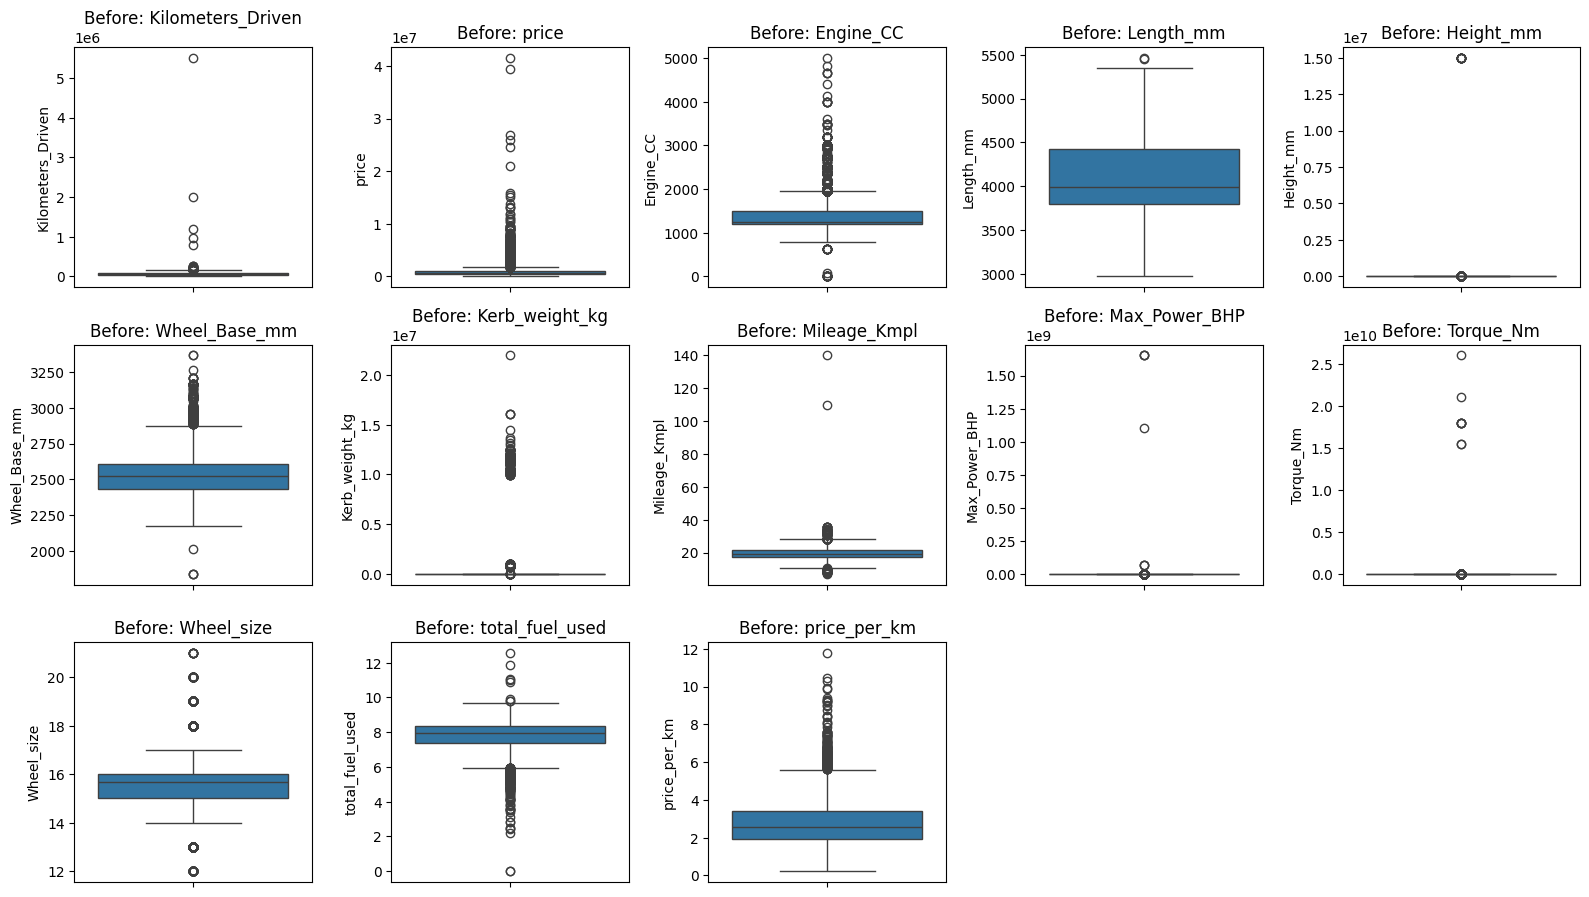

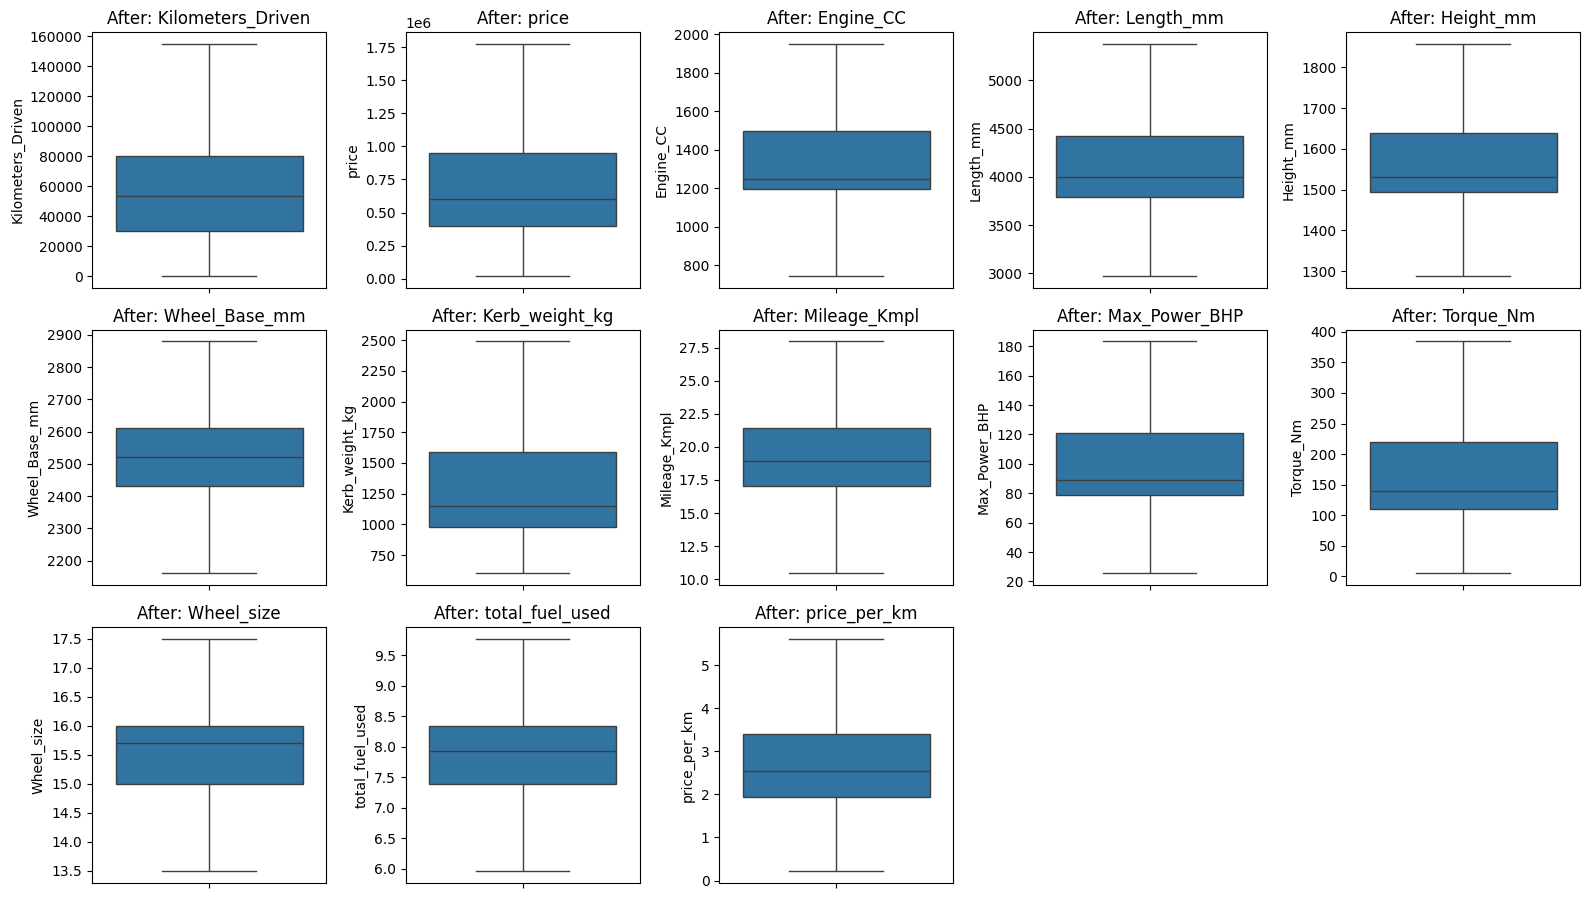

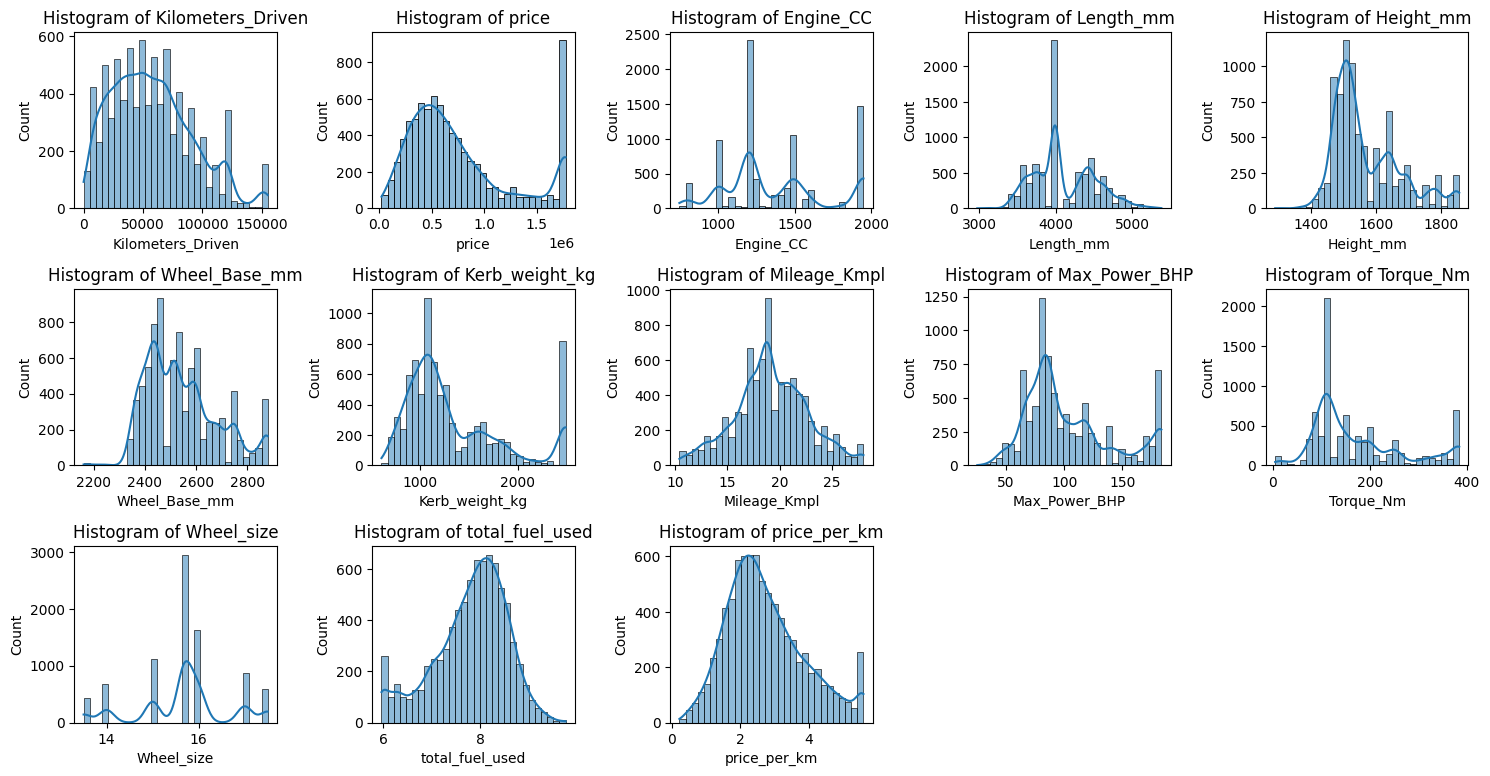

Dropped columns: []
Remaining rows: 8250
   Body_Type  Kilometers_Driven  Owner_Count  oem  model  modelYear     price  \
0          2           120000.0            3   20    160       2015  400000.0   
1          7            32706.0            2    6     50       2018  811000.0   

   Fuel_Type  Transmission  Engine_CC  ...  Tyre_Type  Mileage_Kmpl  \
0          4             1      998.0  ...          7          23.1   
1          4             1     1497.0  ...          7          17.0   

   Max_Power_BHP  Torque_Nm  Seats  Wheel_size  City  car_age  \
0          67.04       90.0    5.0   15.697549     0        9   
1         121.31      150.0    5.0   16.000000     0        6   

   total_fuel_used  price_per_km  
0         8.555607      1.466337  
1         7.562620      3.250246  

[2 rows x 24 columns]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns to check for outliers
numeric_columns = [
    'Kilometers_Driven', 'price', 'Engine_CC','Length_mm',
    'Height_mm', 'Wheel_Base_mm','Kerb_weight_kg', 'Mileage_Kmpl',
    'Max_Power_BHP', 'Torque_Nm','Wheel_size','total_fuel_used','price_per_km',
]

# Visualize boxplots before handling outliers
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(df[col])
    plt.title(f'Before: {col}')
plt.tight_layout()
plt.show()

# Detect and cap/floor outliers using IQR
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Drop columns with a single unique value
columns_to_drop = [col for col in df.columns if df[col].nunique() == 1]
df = df.drop(columns=columns_to_drop)

# Visualize boxplots after handling outliers
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(df[col])
    plt.title(f'After: {col}')
plt.tight_layout()
plt.show()

# Histograms to visualize distributions
plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 5, i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Histogram of {column}')
    plt.tight_layout()

plt.show()

# Log dropped columns and remaining DataFrame details
print("Dropped columns:", columns_to_drop)
print(f"Remaining rows: {df.shape[0]}")
print(df.head(2))


In [ ]:
# Check for NaN and inf values
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8250 entries, 0 to 8368
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Body_Type          8250 non-null   int64  
 1   Kilometers_Driven  8250 non-null   float64
 2   Owner_Count        8250 non-null   int64  
 3   oem                8250 non-null   int64  
 4   model              8250 non-null   int64  
 5   modelYear          8250 non-null   int64  
 6   price              8250 non-null   float64
 7   Fuel_Type          8250 non-null   int64  
 8   Transmission       8250 non-null   int64  
 9   Engine_CC          8250 non-null   float64
 10  Length_mm          8250 non-null   float64
 11  Height_mm          8250 non-null   float64
 12  Wheel_Base_mm      8250 non-null   float64
 13  Kerb_weight_kg     8250 non-null   float64
 14  Tyre_Type          8250 non-null   int64  
 15  Mileage_Kmpl       8250 non-null   float64
 16  Max_Power_BHP      8250 non-n

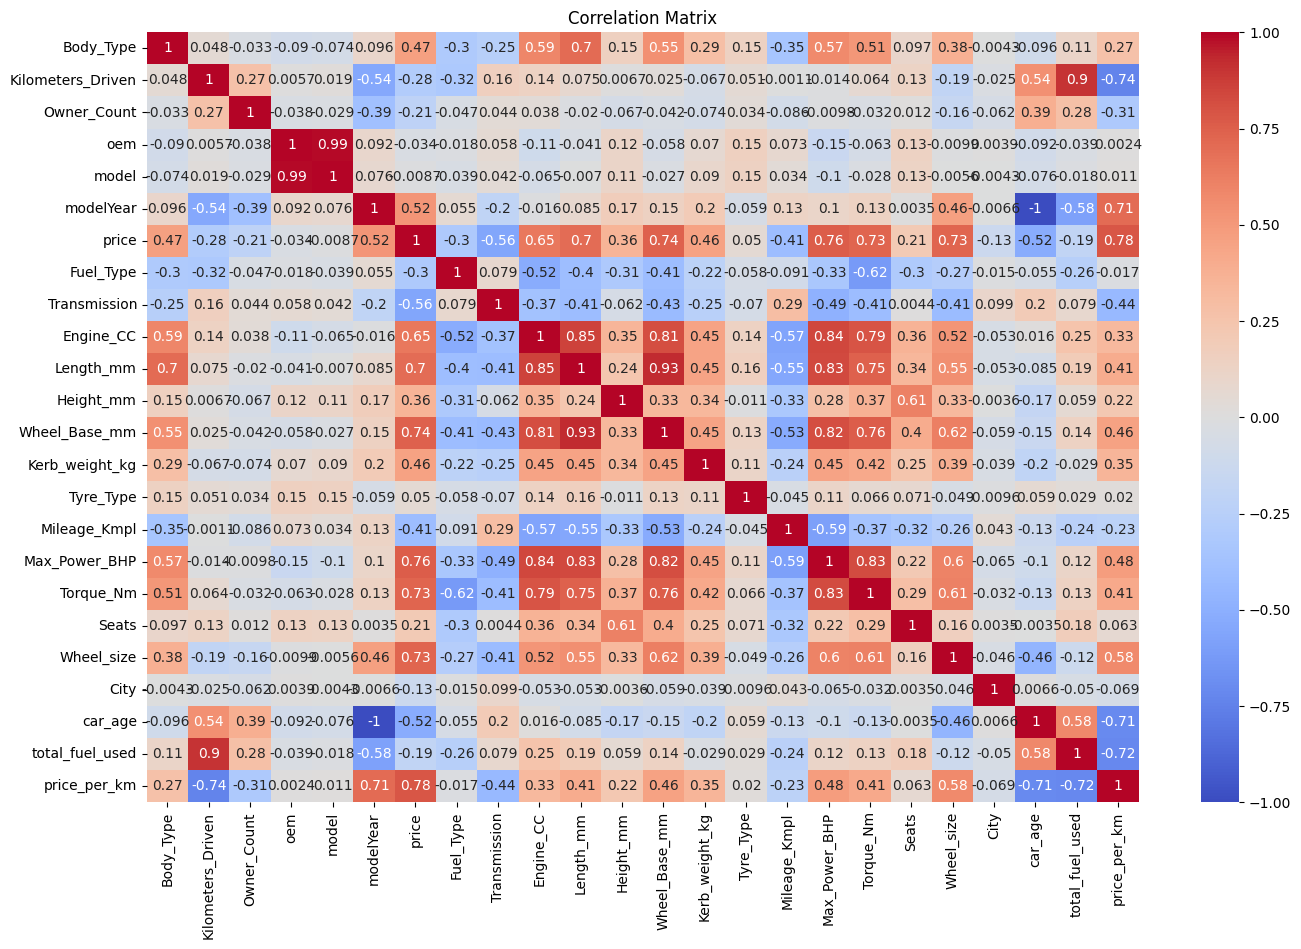

Highly Correlated Pairs (threshold > 0.80):
[('Kilometers_Driven', 'total_fuel_used'), ('oem', 'model'), ('model', 'oem'), ('modelYear', 'car_age'), ('Engine_CC', 'Length_mm'), ('Engine_CC', 'Wheel_Base_mm'), ('Engine_CC', 'Max_Power_BHP'), ('Length_mm', 'Engine_CC'), ('Length_mm', 'Wheel_Base_mm'), ('Length_mm', 'Max_Power_BHP'), ('Wheel_Base_mm', 'Engine_CC'), ('Wheel_Base_mm', 'Length_mm'), ('Wheel_Base_mm', 'Max_Power_BHP'), ('Max_Power_BHP', 'Engine_CC'), ('Max_Power_BHP', 'Length_mm'), ('Max_Power_BHP', 'Wheel_Base_mm'), ('Max_Power_BHP', 'Torque_Nm'), ('Torque_Nm', 'Max_Power_BHP'), ('car_age', 'modelYear'), ('total_fuel_used', 'Kilometers_Driven')]


In [ ]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix (optional)
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Set a threshold for high correlation
correlation_threshold = 0.80

# Find pairs of highly correlated features
high_correlation_pairs = [
    (col1, col2)
    for col1 in correlation_matrix.columns
    for col2 in correlation_matrix.columns
    if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > correlation_threshold
]

print("Highly Correlated Pairs (threshold > 0.80):")
print(high_correlation_pairs)



In [ ]:
df.drop(['model', 'modelYear','Length_mm','Wheel_Base_mm', 'Max_Power_BHP','total_fuel_used'],axis=1,inplace=True)

In [ ]:
df.head()

,Body_Type,Kilometers_Driven,Owner_Count,oem,price,Fuel_Type,Transmission,Engine_CC,Height_mm,Kerb_weight_kg,Tyre_Type,Mileage_Kmpl,Torque_Nm,Seats,Wheel_size,City,car_age,price_per_km
0,2,120000.0,3,20,400000.0,4,1,998.0,1565.0,835.0,7,23.10,90.00,5.0,15.697549,0,9,1.466337
1,7,32706.0,2,6,811000.0,4,1,1497.0,1647.0,1242.0,7,17.00,150.00,5.0,16.000000,0,6,3.250246
2,2,11949.0,1,29,585000.0,4,1,1199.0,1535.0,1012.0,5,23.84,114.00,5.0,14.000000,0,6,3.911184
3,8,17794.0,1,9,462000.0,4,1,1197.0,1520.0,1180.0,7,19.10,113.75,5.0,14.000000,0,10,3.294496
4,7,60000.0,1,20,790000.0,1,1,1248.0,1595.0,1230.0,7,23.65,200.00,5.0,16.000000,0,9,2.650892


In [ ]:
df.isnull().any()

,0
Body_Type,False
Kilometers_Driven,False
Owner_Count,False
oem,False
price,False
Fuel_Type,False
Transmission,False
Engine_CC,False
Height_mm,False
Kerb_weight_kg,False


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'price' is your target variable
X = df.drop('price', axis=1)
y = df['price']

# Train-test split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary of models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42)
}

# Function to evaluate model performance
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate RMSE and R-squared
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    return rmse, r2


# Display the sizes of the train and test sets
print(f"Training set size (X_train): {len(X_train)}")
print(f"Test set size (X_test): {len(X_test)}")
print(f"Training labels size (y_train): {len(y_train)}")
print(f"Test labels size (y_test): {len(y_test)}")

# Store evaluation results
results = {}

# Evaluate each model
for model_name, model in models.items():
    rmse, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[model_name] = {'RMSE': rmse, 'R2 Score': r2}

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results).T
print("Model Evaluation Results:")
print(results_df)



Training set size (X_train): 6600
Test set size (X_test): 1650
Training labels size (y_train): 6600
Test labels size (y_test): 1650
Model Evaluation Results:
                                      RMSE  R2 Score
Linear Regression            162787.437951  0.890085
Decision Tree Regressor      109266.269920  0.950479
Random Forest Regressor       73591.452161  0.977537
Gradient Boosting Regressor   95004.750531  0.962562


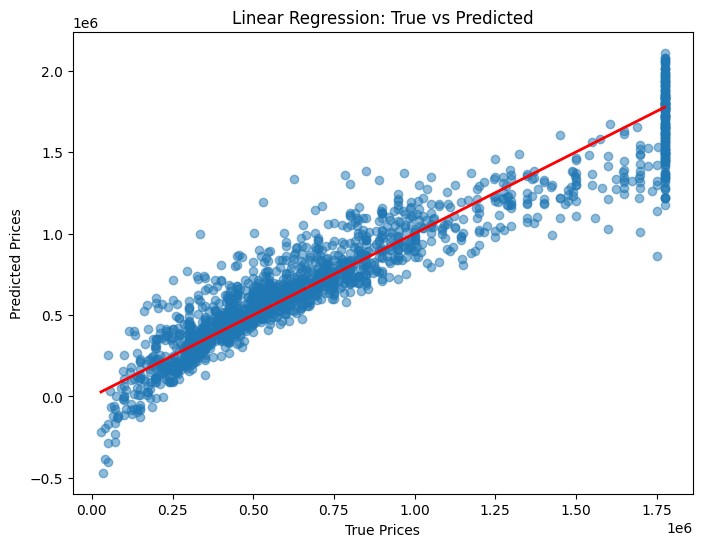

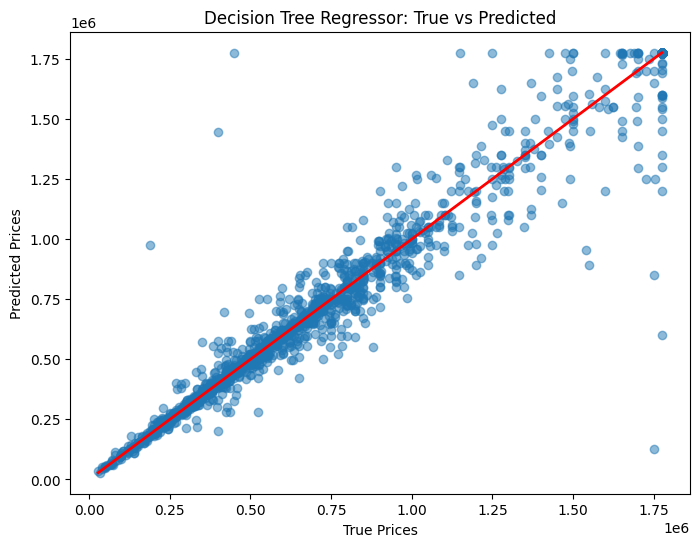

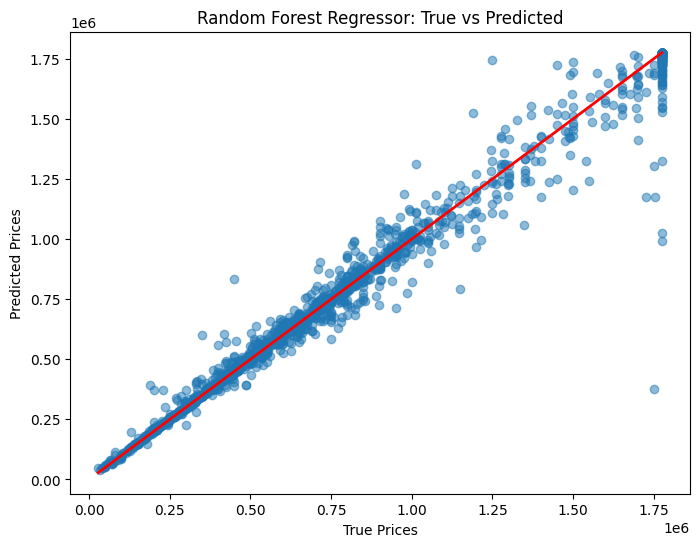

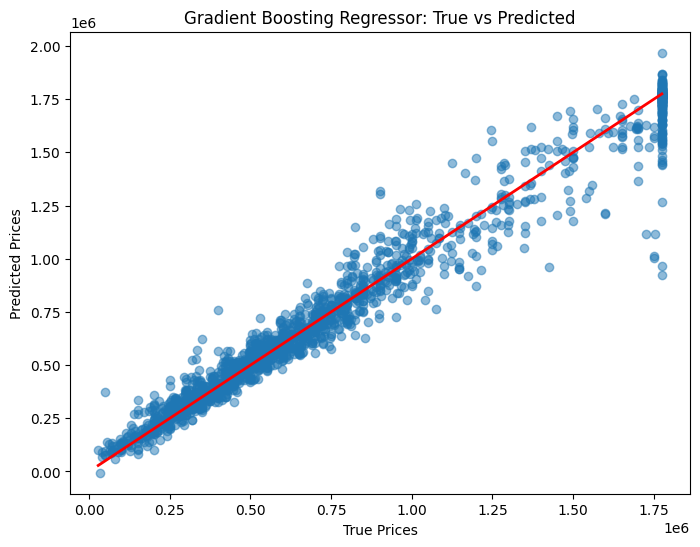

In [ ]:
#Plot Predictions vs. True Values: Visualize how well the models predict the target variable:
import matplotlib.pyplot as plt

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
    plt.title(f"{model_name}: True vs Predicted")
    plt.xlabel("True Prices")
    plt.ylabel("Predicted Prices")
    plt.show()


In [ ]:
#Cross-Validation: Add cross-validation to ensure the models generalize well across splits:
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f"{model_name}: Average R2 from 5-fold CV = {cv_scores.mean():.4f}")


Linear Regression: Average R2 from 5-fold CV = 0.8803
Decision Tree Regressor: Average R2 from 5-fold CV = 0.9504
Random Forest Regressor: Average R2 from 5-fold CV = 0.9799
Gradient Boosting Regressor: Average R2 from 5-fold CV = 0.9618


In [ ]:
import pickle

# Save the Random Forest model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(models['Random Forest Regressor'], file)
